# Creating Word Vectors with word2vec

In this notebook, we create word vectors from a corpus of public-domain books, a selection from [Project Gutenberg](https://www.gutenberg.org/).

#### Load dependencies

In [1]:
import nltk
from nltk import word_tokenize, sent_tokenize
import gensim
from gensim.models.word2vec import Word2Vec
from sklearn.manifold import TSNE
import pandas as pd
from bokeh.io import output_notebook
from bokeh.plotting import show, figure
%matplotlib inline

In [ ]:
nltk.download('punkt') # English-language sentence tokenizer (not all periods end sentences; not all sentences start with a capital letter)

#### Load data

In [ ]:
nltk.download('gutenberg')

In [ ]:
from nltk.corpus import gutenberg

In [ ]:
len(gutenberg.fileids())

In [ ]:
gutenberg.fileids()

#### Tokenize text

In [ ]:
gberg_sent_tokens = sent_tokenize(gutenberg.raw())

In [ ]:
gberg_sent_tokens[0:5]

In [ ]:
gberg_sent_tokens[1]

In [ ]:
word_tokenize(gberg_sent_tokens[1])

In [ ]:
word_tokenize(gberg_sent_tokens[1])[14]

In [ ]:
# a convenient method that handles newlines, as well as tokenizing sentences and words in one shot
gberg_sents = gutenberg.sents()

In [ ]:
gberg_sents[0:5]

In [ ]:
gberg_sents[4]

In [ ]:
gberg_sents[4][14]

In [ ]:
# another convenient method that we don't immediately need: 
gutenberg.words() 

In [ ]:
# gutenberg.words() is analogous to the following line, which need not be run: 
# word_tokenize(gutenberg.raw())

In [ ]:
# our Gutenberg corpus is 2.6m words in length: 
len(gutenberg.words())

#### Run word2vec

In [ ]:
# model = Word2Vec(sentences=gberg_sents, size=64, sg=1, window=10, min_count=5, seed=42, workers=8)

In [ ]:
# model.save('raw_gutenberg_model.w2v')

#### Explore model

In [ ]:
# skip re-training the model with the next line:  
model = gensim.models.Word2Vec.load('raw_gutenberg_model.w2v')

In [ ]:
model['dog']

In [ ]:
len(model['dog'])

In [ ]:
model.most_similar('dog') # distance

In [ ]:
model.most_similar('think')

In [ ]:
model.most_similar('day')

In [ ]:
model.most_similar('father')

In [ ]:
model.doesnt_match("mother father daughter dog".split())

In [ ]:
model.similarity('father', 'dog')

In [ ]:
# close, but not quite; distinctly in female direction: 
model.most_similar(positive=['father', 'woman'], negative=['man']) 

In [ ]:
# more confident about this one: 
model.most_similar(positive=['son', 'woman'], negative=['man']) 

In [ ]:
model.most_similar(positive=['husband', 'woman'], negative=['man']) 

In [ ]:
model.most_similar(positive=['king', 'woman'], negative=['man'], topn=30) 

In [ ]:
# impressive for such a small data set, without any cleaning, e.g., to lower case (covered next)

#### Reduce word vector dimensionality with t-SNE

In [ ]:
model.wv.vocab

In [ ]:
len(model.wv.vocab)

In [ ]:
X = model[model.wv.vocab]

In [ ]:
tsne = TSNE(n_components=2, n_iter=1000) # 200 is minimum iter; default is 1000

In [ ]:
X_2d = tsne.fit_transform(X)

In [ ]:
X_2d[0:5]

In [ ]:
# create DataFrame for storing results and plotting
coords_df = pd.DataFrame(X_2d, columns=['x','y'])
coords_df['token'] = model.wv.vocab.keys()

In [ ]:
coords_df.head()

In [ ]:
# coords_df.to_csv('raw_gutenberg_tsne.csv', index=False)

#### Visualize 2D representation of word vectors

In [2]:
coords_df = pd.read_csv('raw_gutenberg_tsne.csv')

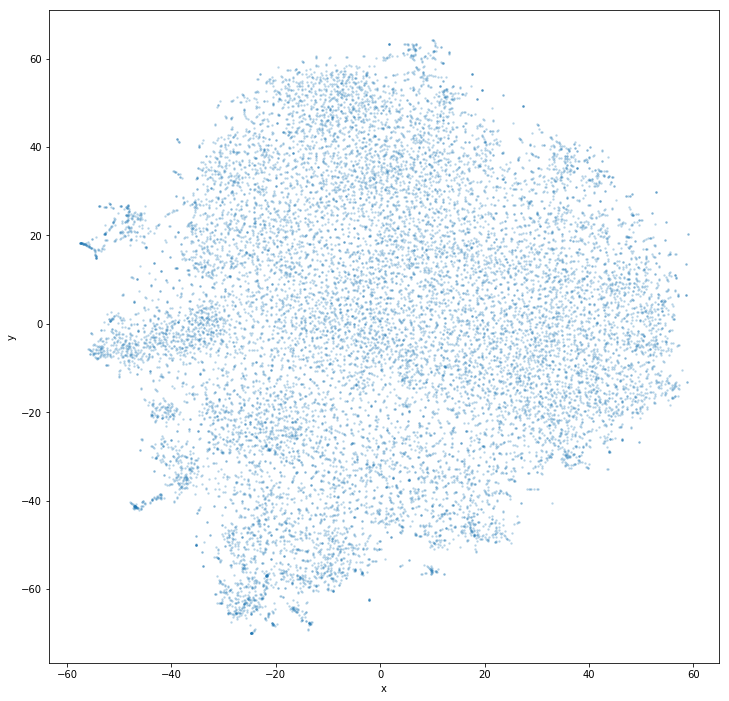

In [3]:
_ = coords_df.plot.scatter('x', 'y', figsize=(12,12), marker='.', s=10, alpha=0.2)

In [4]:
output_notebook() # output bokeh plots inline in notebook

Loading BokehJS ...

In [5]:
subset_df = coords_df.sample(n=5000)

In [6]:
p = figure(plot_width=800, plot_height=800)
_ = p.text(x=subset_df.x, y=subset_df.y, text=subset_df.token)

In [7]:
show(p)